Project 3 - Part A: Logistic Regression Model

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)

Data Loading and Pre_Processing 

In [5]:
#download cleaned data set 
df = pd.read_csv('cleaned_new_train_EGN5442.csv')
print(df.head())

   Unnamed: 0  y  x5  x9  x10  x11  x12  x13  x15  x16  ...  x29_(991&&)  \
0           0  1  50   5    5    5    4    3    3    3  ...        False   
1           1  1  44   1    1    1    1    3    1    4  ...        False   
2           2  0  72   3    1    5    5    3    2    3  ...        False   
3           3  0  38   1    3    1    3    5    5    5  ...        False   
4           4  1  37   5    5    5    5    2    5    4  ...        False   

   x29_(992&&)  x29_(993&&)  x29_(994&&)  x29_(995&&)  x29_(996&&)  \
0        False        False        False        False        False   
1        False        False        False        False        False   
2        False        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   

   x29_(997&&)  x29_(998&&)  x29_(999&&)  x5_binned  
0        False        False        False          2  
1        False

In [6]:
print(df.info())
print(df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 107734 entries, Unnamed: 0 to x5_binned
dtypes: bool(107712), float64(1), int64(21)
memory usage: 9.7 MB
None
       Unnamed: 0          y         x5         x9        x10        x11  \
count   94.000000  94.000000  94.000000  94.000000  94.000000  94.000000   
mean    46.500000   0.446809  40.063830   2.755319   2.968085   2.797872   
std     27.279418   0.499828  15.429206   1.325403   1.541206   1.463387   
min      0.000000   0.000000   9.000000   0.000000   0.000000   0.000000   
25%     23.250000   0.000000  29.000000   2.000000   2.000000   2.000000   
50%     46.500000   0.000000  40.500000   3.000000   3.000000   3.000000   
75%     69.750000   1.000000  52.000000   3.750000   4.000000   4.000000   
max     93.000000   1.000000  77.000000   5.000000   5.000000   5.000000   

             x12        x13        x15        x16  ...        x19        x20  \
count  94.000000  94.000000  94.000000  94.000

C:\Users\jialj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\jialj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [7]:
df = df.drop(columns=['x31'], errors='ignore')

Train / Validation / Test Split & Data Scaling

In [8]:
y = df['y']              

# X = all other columns
X = df.drop(columns=['y'])
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (94, 107732)
y shape: (94,)


In [9]:
#first split 60/40 train/temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=0, stratify=y
)

#second split 20/20 validation/test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=0, stratify=y_temp
)

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape,  y_val.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (56, 107732) (56,)
Val  : (19, 107732) (19,)
Test : (19, 107732) (19,)


In [10]:
# Scale data
scaler = StandardScaler()

# fit train 
X_train_scaled = scaler.fit_transform(X_train)

#transform validation and test w scaler 
X_val_scaled  = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Models and Testing

In [13]:
param_grid_lg = [
    {'penalty': ['l2'],
     'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['lbfgs', 'liblinear', 'saga'],
     'max_iter': [1000]},
    {'penalty': ['l1'],
     'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['liblinear', 'saga'],
     'max_iter': [1000]},
]

log_reg = LogisticRegression()

lg_grid = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid_lg,
    n_iter=25,
    scoring='roc_auc',
    cv=5,           # k-fold CV on the TRAIN set
    n_jobs=-1,
    random_state=0,
    verbose=1
)

lg_grid.fit(X_train_scaled, y_train)
print("Best params (RandomizedSearchCV):", lg_grid.best_params_)

lgmodel = lg_grid.best_estimator_


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best params (RandomizedSearchCV): {'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 10}


C:\Users\jialj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation AUC: 0.9659090909090909
Test AUC: 0.8444444444444444


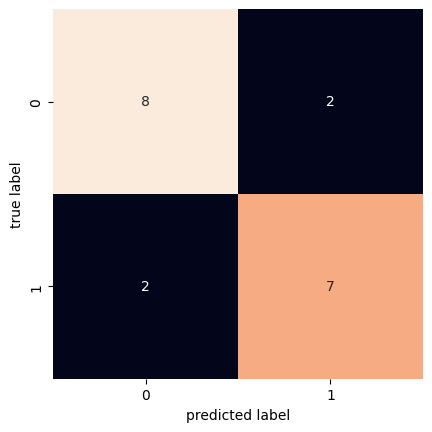

In [14]:
# Validation performance (used for model selection / threshold analysis)
y_val_pred  = lgmodel.predict(X_val_scaled)
y_val_proba = lgmodel.predict_proba(X_val_scaled)[:, 1]

val_auc = metrics.roc_auc_score(y_val, y_val_proba)
print("Validation AUC:", val_auc)

# Final TEST performance (only once at the end)
y_test_pred  = lgmodel.predict(X_test_scaled)
y_test_proba = lgmodel.predict_proba(X_test_scaled)[:, 1]

test_auc = metrics.roc_auc_score(y_test, y_test_proba)
print("Test AUC:", test_auc)

cm = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


C:\Users\jialj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\jialj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


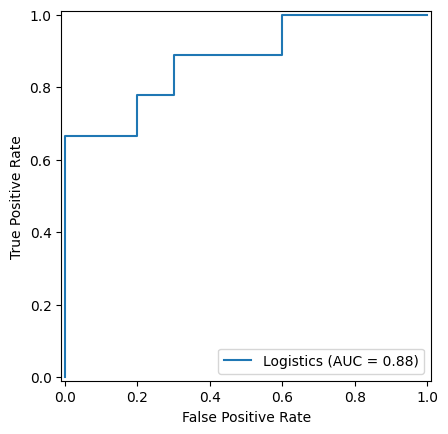

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,lgmodel.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Logistics')
display.plot()

plt.show()

Improve Model using Principle Component Analysis 

In [17]:
# PCA to reduce dimensions and improve model 

#Coeefficient matrix 
coefs = pd.DataFrame({
    'feature': X_train.columns,
    'coef': lgmodel.coef_[0]
})
coefs['abs_coef'] = coefs['coef'].abs()
coefs.sort_values('abs_coef', ascending=False).head(10)

,feature,coef,abs_coef
16,x28,-3.117788,3.117788
103929,x26_PT,-1.402461,1.402461
7,x15,0.659543,0.659543
12,x20,0.604766,0.604766
103927,x14_5,0.578521,0.578521
9,x17,0.549836,0.549836
107096,x29_(3952&&),-0.448636,0.448636
76252,x2_#75095,-0.448636,0.448636
107175,x29_(427&&),0.436382,0.436382
65470,x2_#65391,0.436382,0.436382


In [18]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 1. Create PCA features (this is the feature engineering step)
pca = PCA(n_components=20, random_state=0)   # try 20; you can also try 30, 50, etc.
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca   = pca.transform(X_val_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# 2. Fit a new logistic regression model on PCA features
log_pca = LogisticRegression(max_iter=1000)
log_pca.fit(X_train_pca, y_train)

# 3. Evaluate AUC on validation and test
val_proba_pca  = log_pca.predict_proba(X_val_pca)[:, 1]
test_proba_pca = log_pca.predict_proba(X_test_pca)[:, 1]

val_auc_pca  = metrics.roc_auc_score(y_val, val_proba_pca)
test_auc_pca = metrics.roc_auc_score(y_test, test_proba_pca)

print("PCA Logistic Regression - Validation AUC:", val_auc_pca)
print("PCA Logistic Regression - Test AUC      :", test_auc_pca)


PCA Logistic Regression - Validation AUC: 0.9431818181818181
PCA Logistic Regression - Test AUC      : 0.9111111111111111
